In [59]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import imblearn.over_sampling as imover
import imblearn.under_sampling as imunder

In [60]:
data_df = pd.read_csv("processed.csv")

# separate into X and y
features = "Age,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,country_Canada,country_New_Zealand,country_Other,country_Republic_of_Ireland,country_UK,country_USA,country_Australia,gender_F,gender_M,eth_Black,eth_Mixed-Black/Asian,eth_Mixed-White/Asian,eth_Mixed-White/Black,eth_Other,eth_White,eth_Asian".split(",")
# drugs = "Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA".split(",")
drugs = ["Alcohol"]

# print(features)
# print(drugs)

X = data_df[features]
# print(X)
# for drug in drugs:
#     y = data_df[drug]
    # print(y)
# print(f"Shape of X: {X.shape}")
# print(f"Shape of y: {y.shape}")

In [61]:
for drug in drugs:
    y = data_df[drug]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=777)
# print(f"Shape of X: {X.shape}")
# print(f"Shape of X_train: {X_train.shape}")
# print(f"Shape of X_val: {X_val.shape}")
# print(f"Shape of y: {y.shape}")
# print(f"Shape of y_train: {y_train.shape}")
# print(f"Shape of y_val: {y_val.shape}")

for drug in drugs:
    # first sampling: random over sampling
    X_1, y_1 = imover.RandomOverSampler().fit_resample(X_train, y_train)
    # second sampling: adasyn
    X_2, y_2 = imover.ADASYN().fit_resample(X_1, y_1)
    # # third sampling: all knn
    X_3, y_3 = imunder.AllKNN().fit_resample(X_2, y_2)

    

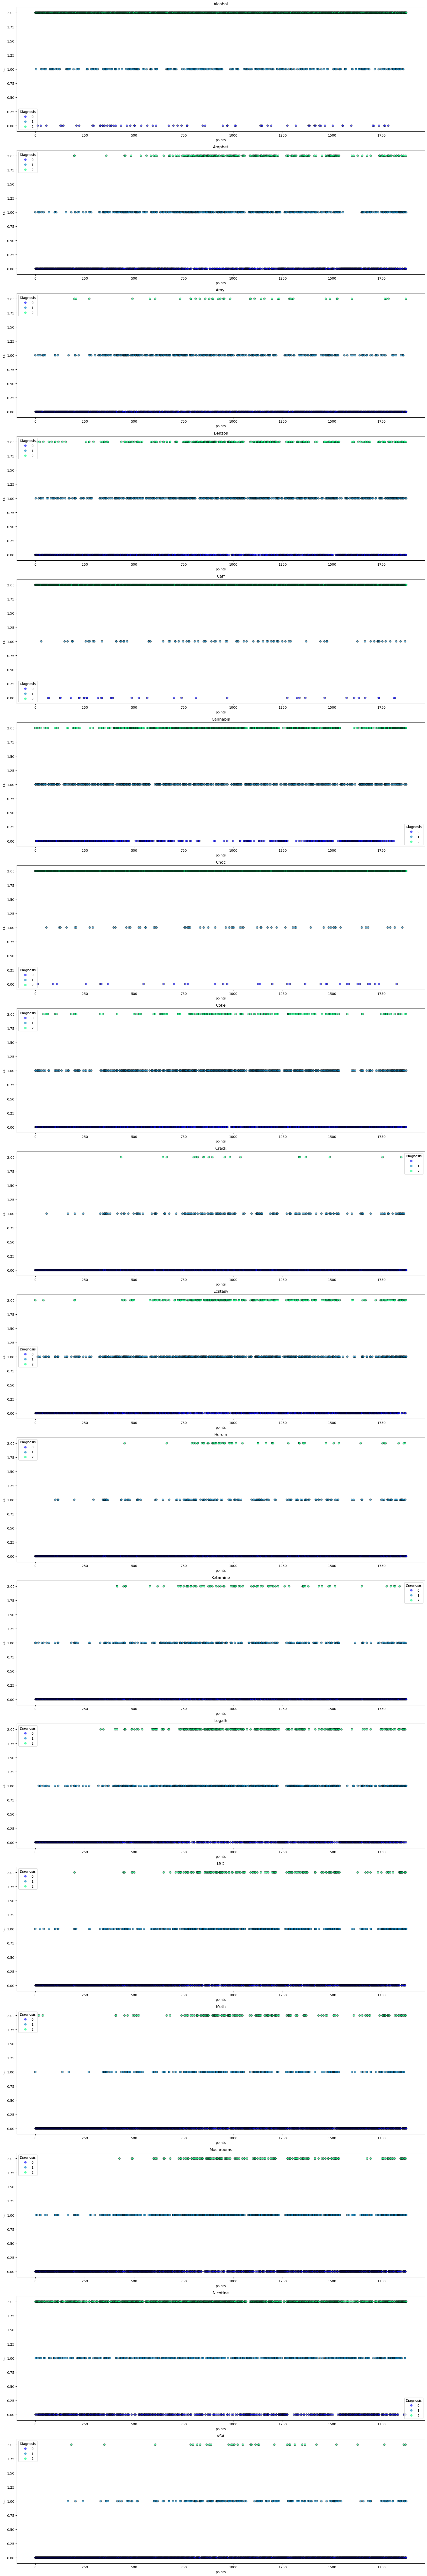

In [ ]:
# for drug in drugs:
#     columns = 2
#     rows = len(drugs)
#     plt.figure(figsize=(18, 6))
#     plt.scatter(range(X_train.shape[0]), y_train)
#     plt.xlabel("points")
#     plt.ylabel("y_train")
#     plt.title("Original")
#     plt.show()

#     plt.figure(figsize=(18, 6))
#     plt.scatter(range(X_3.shape[0]), y_3)
#     plt.xlabel("points")
#     plt.ylabel("y_3")
#     plt.title("Sampled")
#     plt.show()

# rows = len(drugs)
# columns = 1
# fig, ax = plt.subplots(rows, columns, figsize = (rows*columns, rows*6)) # makes an image in a 2*8 grid so there's 16 graphs total
# for i,drug in enumerate(drugs):
#     y = data_df[drug]
#     plot = ax[i].scatter(range(X.shape[0]), y, c = y, cmap = "winter", edgecolor = "k", alpha = 0.6)
#     ax[i].set_xlabel("points")
#     ax[i].set_ylabel("CL")
#     ax[i].set_title(drug)
#     ax[i].legend(*plot.legend_elements(),title = "Diagnosis")

# plt.tight_layout()
# plt.show()